# Exploration des données

In [70]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from modules.loader import Loader
from modules.data_cleaning import apply_zscore
sns.set(rc = {'figure.figsize':(20,5)})

raw = '../../datas/RAW/E2/'
dfs = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Extraction des donnees

In [71]:
Loader.extract_data(
    '../../datas/RAW/E2/',
    '../../datas/ZIP/archive.zip'
)

Extracted 9 files in '../../datas/RAW/E2/'


## Exploration de la geolocalisation

In [72]:
geolocalisation = pd.read_csv(raw + 'olist_geolocation_dataset.csv')
dfs.append(geolocalisation)
print(geolocalisation.shape)
geolocalisation.head(5)

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [73]:
print('nb villes: ', len(geolocalisation.geolocation_city.unique()), '\n', geolocalisation.geolocation_city.unique())
print('nb etats: ', len(geolocalisation.geolocation_state.unique()), '\n', geolocalisation.geolocation_state.unique())

nb villes:  8011 
 ['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']
nb etats:  27 
 ['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']


![Population of brazil by state](documentation\2012_population_by_state.png)

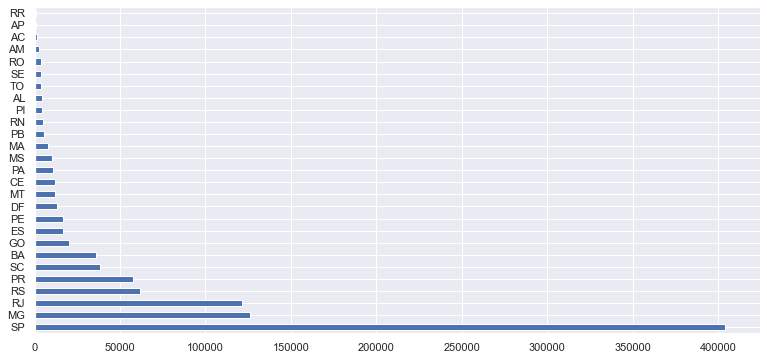

In [74]:
geolocalisation.geolocation_state.value_counts().plot(kind='barh', figsize=(13,6));

# Table customer

In [75]:
customer = pd.read_csv(raw + 'olist_customers_dataset.csv')
dfs.append(customer)
print(customer.shape)
customer.head(5)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [76]:
print('nb villes: ', len(customer.customer_city.unique()), '\n', customer.customer_city.unique())
print('nb etats: ', len(customer.customer_state.unique()), '\n', customer.customer_state.unique())

nb villes:  4119 
 ['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']
nb etats:  27 
 ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


# Table orders

In [81]:
order = pd.read_csv(raw + 'olist_orders_dataset.csv')
order.order_purchase_timestamp = pd.to_datetime(order.order_purchase_timestamp)
dfs.append(order)

print(order.shape)
order.head(5)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [82]:
print('Status: ', order.order_status.unique())
order['order_status'].value_counts()

Status:  ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [91]:
order['year_month'] = order.order_purchase_timestamp.apply(
    lambda x: 
    '{:0d}-{:02d}'.format(x.date().year, x.date().month)
)
order.year_month.unique().shape

(25,)

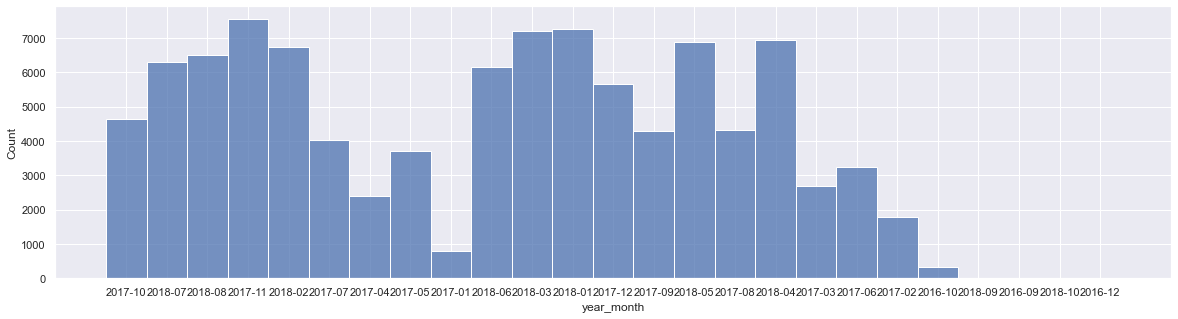

In [92]:
sns.histplot(x='year_month', data=order, bins=25);

In [95]:
import plotly.express as px

fig = px.histogram(data_frame=order, x='year_month', nbins=25)
fig.write_html("plots/frequence_commandes.html")

# Table order items

In [ ]:
order_items = pd.read_csv(raw + 'olist_order_items_dataset.csv')
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)

dfs.append(order_items)
print(order_items.shape)
order_items.head(5)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


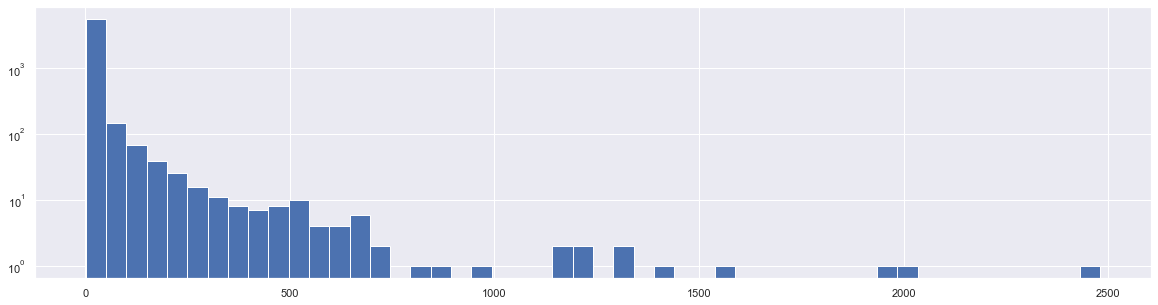

In [ ]:
order_items.price.value_counts().hist(log=True, bins=50);

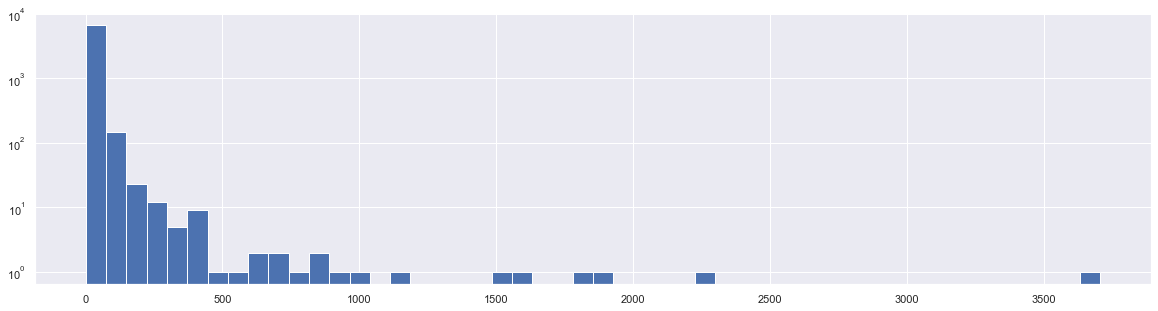

In [ ]:
order_items.freight_value.value_counts().hist(log=True, bins=50);

In [ ]:
order_items.sort_values(by='shipping_limit_date', inplace=True)
# an mois jour
min = pd.Timestamp(2018, 3, 1)
max = pd.Timestamp(2018, 6, 30)
mask = (order_items['shipping_limit_date'] >= min) & (order_items['shipping_limit_date'] < max)
order_items = order_items[mask]

In [ ]:
def bin_f(x):
    d, m, y = x.date().day, x.date().month, x.date().year
    h = x.time().hour
    if h < 6:
        return "{:04d} {:02d} {:02d} 1ear".format(y, m, d)
    elif h < 12:
        return "{:04d} {:02d} {:02d} 2mor".format(y, m, d)
    elif h < 18:
        return "{:04d} {:02d} {:02d} 3aft".format(y, m, d)
    else:
        return "{:04d} {:02d} {:02d} 4nig".format(y, m, d)

order_items["bin"] = order_items["shipping_limit_date"].apply(bin_f)
grouped = order_items.groupby("bin", as_index=False)['price'].agg(np.sum)
grouped.columns = ['time_bin', 'somme']
grouped = grouped.set_index('time_bin')
order_items.sort_index(inplace=True)

C:\Users\nicol\AppData\Local\Temp/ipykernel_10368/3708261340.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items["bin"] = order_items["shipping_limit_date"].apply(bin_f)
F:\Anaconda\envs\E2\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


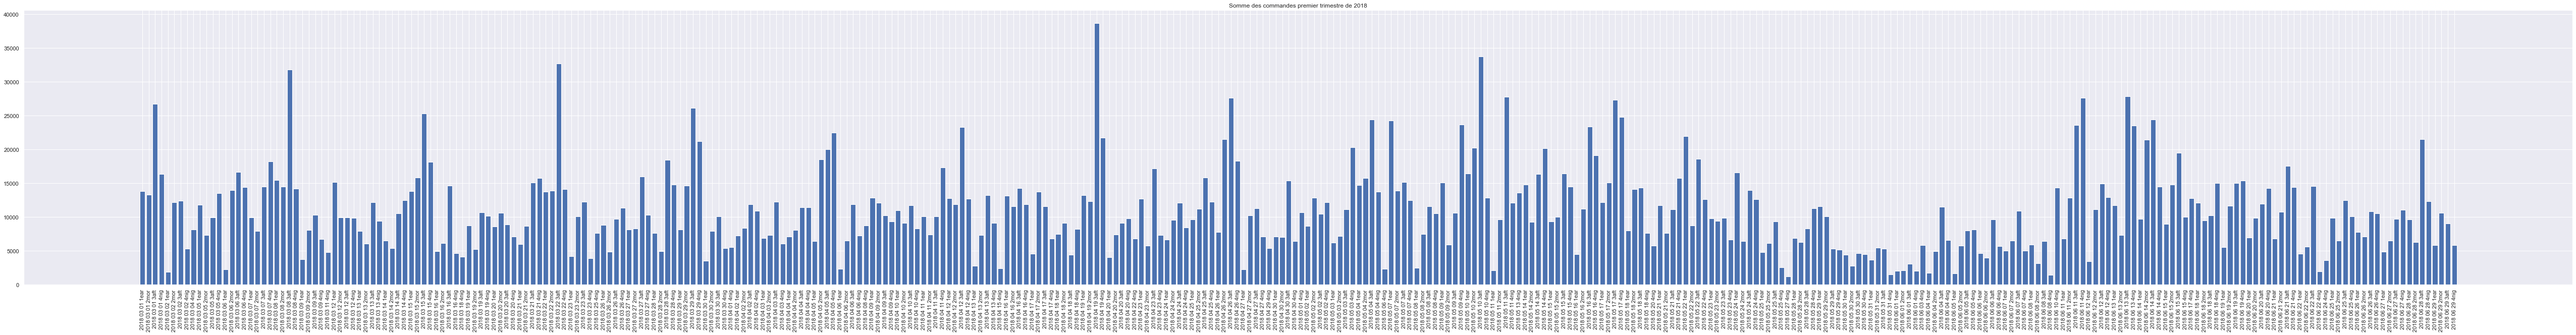

In [ ]:
plt.figure(figsize=(len(grouped)/4, 10))
plt.xticks(rotation=90)
plt.bar(grouped.index, grouped.somme);
plt.title('Somme des commandes premier trimestre de 2018')
plt.savefig('plots/somme_commande_tri_2018.png')
plt.show()

# Table products

In [ ]:
products = pd.read_csv(raw + 'olist_products_dataset.csv')
dfs.append(products)
print(products.shape)
products.head(5)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products.columns[-4:]

Index(['product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

In [ ]:
products.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

# Table sellers

In [ ]:
sellers = pd.read_csv(raw + 'olist_sellers_dataset.csv')
dfs.append(sellers)
print(sellers.shape)
sellers.head(5)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
print('nb ville: ', len(sellers.seller_city.unique()), '\n', sellers.seller_city.unique()[:10])
print('nb etats: ', len(sellers.seller_state.unique()), '\n', sellers.seller_state.unique())

nb ville:  611 
 ['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina']
nb etats:  23 
 ['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']


# Recherche des valeurs nulles

Certaines commandes ne sont pas livrees, elles sont probablement en cours de livraison lors de l'image de la base de donnees.
    En fait elles sont dans la majoritee des cas livrees mais non recuperees, annulees ou bien ont un status indisponible.

Des produits n'ont pas de caracteristique, fiche technique. J'y jette un oeil.
    Pas d'interpretation a apporter, ce sont des produits a supprimer

## Observations

In [ ]:
for df in dfs:
    if df.isna().sum().sum() != 0:
        print(
            df.isna().sum()
        )

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


## Orders na values

In [ ]:
missing_orders = order[order.isna().any(axis=1)]
missing_orders = missing_orders.drop(columns=['order_id', 'customer_id'])
missing_orders.order_purchase_timestamp = pd.to_datetime(missing_orders.order_purchase_timestamp)
missing_orders.head(5)

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [ ]:
missing_orders['year_month'] = missing_orders.order_purchase_timestamp.apply(
    lambda x: 
    '{:0d} {:02d}'.format(x.date().year, x.date().month)
)
missing_orders.year_month.value_counts().sort_index()

2016 09      3
2016 10     54
2017 01     52
2017 02    139
2017 03    136
2017 04    101
2017 05    155
2017 06    110
2017 07    154
2017 08    138
2017 09    136
2017 10    153
2017 11    256
2017 12    160
2018 01    200
2018 02    172
2018 03    208
2018 04    141
2018 05    124
2018 06     71
2018 07    136
2018 08    161
2018 09     16
2018 10      4
Name: year_month, dtype: int64

In [ ]:
missing_orders.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

In [ ]:
order.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
missing_orders[missing_orders.order_status == 'delivered']

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
3002,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00,2017 11
5323,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00,2017 02
16567,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,2017 02
19031,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00,2017 02
20618,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00,2018 06
22663,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00,2017 02
23156,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,2017 02
26800,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00,2017 01
38290,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00,2017 02
39334,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00,2017 02


## Products na values

In [ ]:
products[products.isna().any(axis=1)].head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [ ]:
products[products['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Recherche des outliers

RAS pour les produits

Les commandes meriteraient un nettoyage, je dois poser la question ou comparer les modeles avec et sans zscore

In [ ]:
for df in dfs:
    print(
        df.select_dtypes(include='number').columns
    )

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'], dtype='object')
Index(['customer_zip_code_prefix'], dtype='object')
Index([], dtype='object')
Index(['order_item_id', 'price', 'freight_value'], dtype='object')
Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')
Index(['seller_zip_code_prefix'], dtype='object')


(32058, 8)

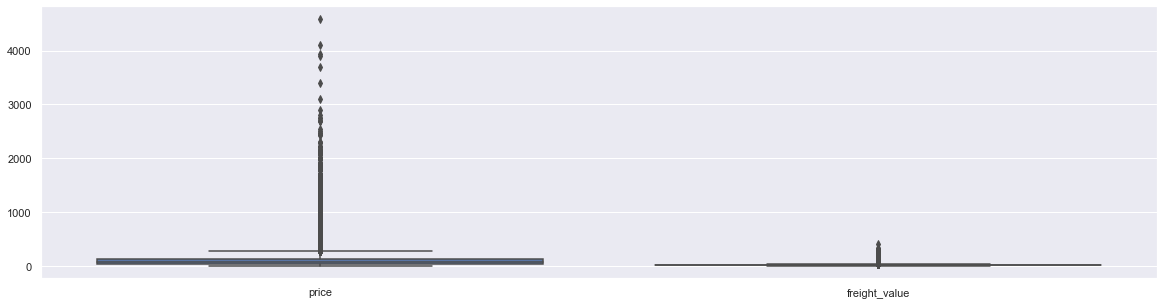

In [ ]:
ax = sns.boxplot(data=order_items[['price', 'freight_value']])
order_items.shape

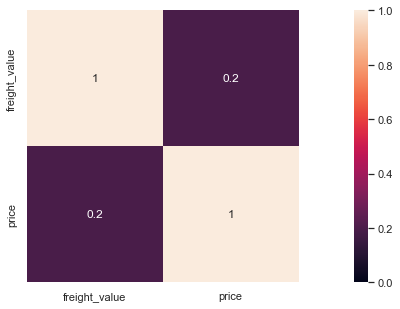

In [ ]:
frame = { 
    'freight_value': (np.abs(zscore(order_items.freight_value)) > 3), 
    'price': (np.abs(zscore(order_items.price)) > 3)
}
outlier_df = pd.DataFrame(frame)
sns.heatmap(outlier_df.corr(), vmin=0, annot=True, square=True);

(32951, 9)

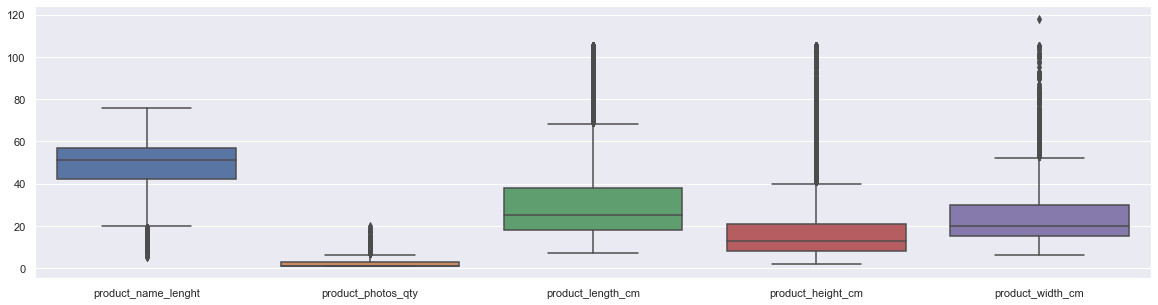

In [ ]:
ax = sns.boxplot(data=products[
       ['product_name_lenght',
       'product_photos_qty', 'product_length_cm',
       'product_height_cm', 'product_width_cm']
])
products.shape

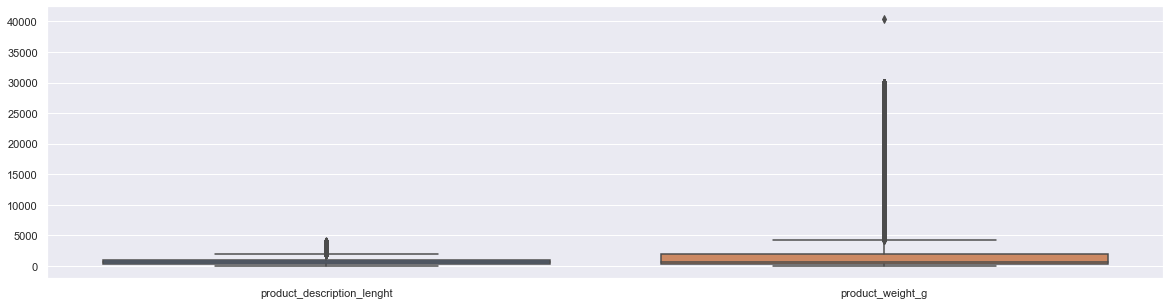

In [ ]:
ax = sns.boxplot(data=products[['product_description_lenght', 'product_weight_g']])